# simple linear regression(SLR)(salary prediction program)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#reading your data (csv,excel)
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
# from sklearn.impute import SimpleImputer
# si = SimpleImputer(missing_values= np.nan,  strategy = "mean", verbose = 0)
# si = si.fit(dataset.iloc[:, 1:3 ])
# dataset.iloc[:, 1:3] = si.transform(dataset.iloc[:, 1:3])
# dataset

#(Since we dont have any missing values we dont have to do this step)

In [4]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([('encoder',OneHotEncoder(), [0])], remainder='passthrough')
# dataset = np.array(ct.fit_transform(dataset),dtype= np.str)
# dataset

In [5]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# dataset[:, 5] = le.fit_transform(dataset[:, 5])
# dataset[:, 5]

In [6]:
#Step 3: seperate independent(X) and dependent variable(y)
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [7]:
# step 4: splitting data into train set test set, using  train_test_split() from sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [8]:
# we will standardize scale like smallest value will be near 0 and highest value will be near to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

# Model building

In [10]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_predicted= lr.predict(X_test)
y_predicted

array([ 38734.62911271, 102734.74576267,  57643.75448656,  56189.20638088,
        96916.55333995,  91098.36091723])

In [13]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
Name: Salary, dtype: int64

OLS = sum(y - y_predict)^2

OLS means (ordinary least squares) 

 nearer the value of ols is 1 accurate is the predicted model

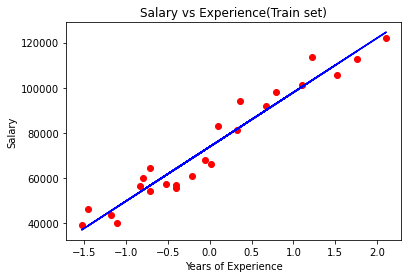

In [14]:
# visualizing the training set results
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience(Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

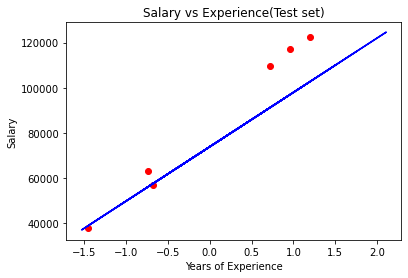

In [15]:
# visualizing the test set results
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

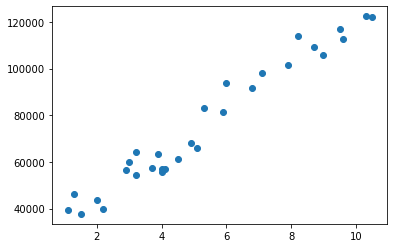

In [16]:
plt.scatter(X,y)
plt.show()

In [17]:
regressor_ols = sm.OLS(y, X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                    2.56e-24
Time:                        20:06:39   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""